## ADVERTISING-MULTIVARIATE LINEAR REGRESSION PROJECT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("advertising.csv")

# EDA

In [3]:
df.shape

(200, 4)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


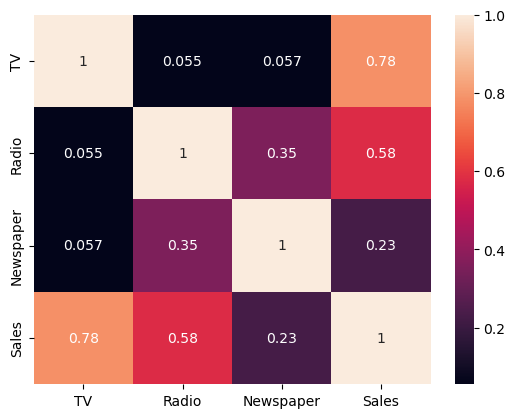

In [8]:
sns.heatmap(df.corr(), annot=True);

In [9]:
df = df.sort_values(by=['TV', 'Radio', 'Newspaper', 'Sales'], ascending=True)
tv=df["TV"]
radio=df["Radio"]
newspaper=df["Newspaper"]
sales=df["Sales"]

# DATA VISUALISATION

''

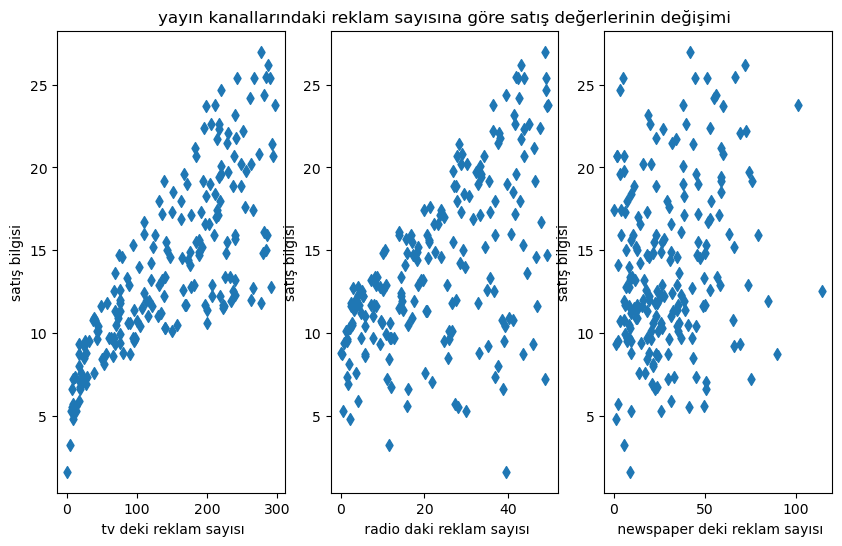

In [10]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(131) # 131 mantıgı: 1 satır,3 kolon, 1. grafık etc
plt.scatter(tv,sales, marker="d"); # marker =d diamond seklinde
plt.xlabel(" tv deki reklam sayısı")
plt.ylabel("satış bilgisi")
#plt.title("tvdeki reklam sayısına göre satış değerlerinin değişimi")

bx=fig.add_subplot(132)
plt.scatter(radio,sales, marker="d"); # marker =d diamond seklinde
plt.xlabel(" radio daki reklam sayısı")
plt.ylabel("satış bilgisi")
plt.title("yayın kanallarındaki reklam sayısına göre satış değerlerinin değişimi")


cx=fig.add_subplot(133)
plt.scatter(newspaper,sales, marker="d"); # marker =d diamond seklinde
plt.xlabel(" newspaper deki reklam sayısı")
plt.ylabel("satış bilgisi")
#plt.title("newspaperdeki reklam sayısına göre satış değerlerinin değişimi")
;

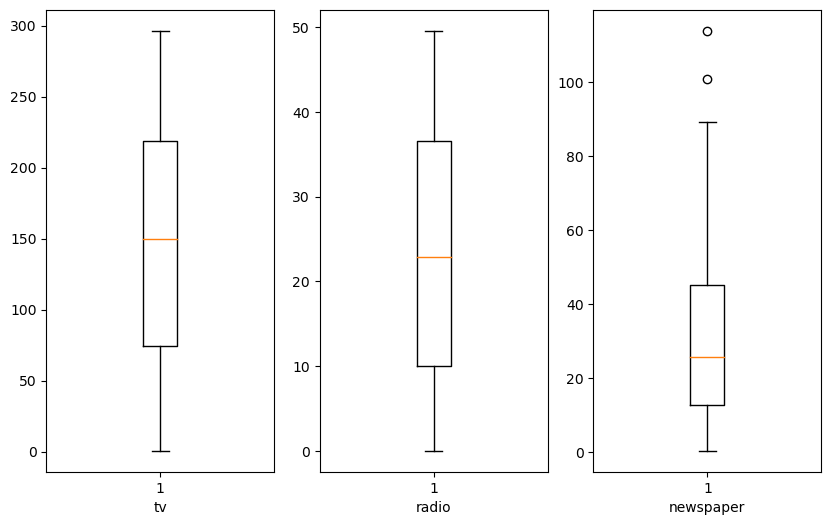

In [11]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(131) # 131 mantıgı: 1 satır,3 kolon, 1. grafık etc
plt.boxplot(tv);
plt.xlabel("tv")

bx=fig.add_subplot(132)
plt.boxplot(radio);
plt.xlabel("radio")

cx=fig.add_subplot(133)
plt.boxplot(newspaper)
plt.xlabel("newspaper");

Text(0, 0.5, 'Sayılar')

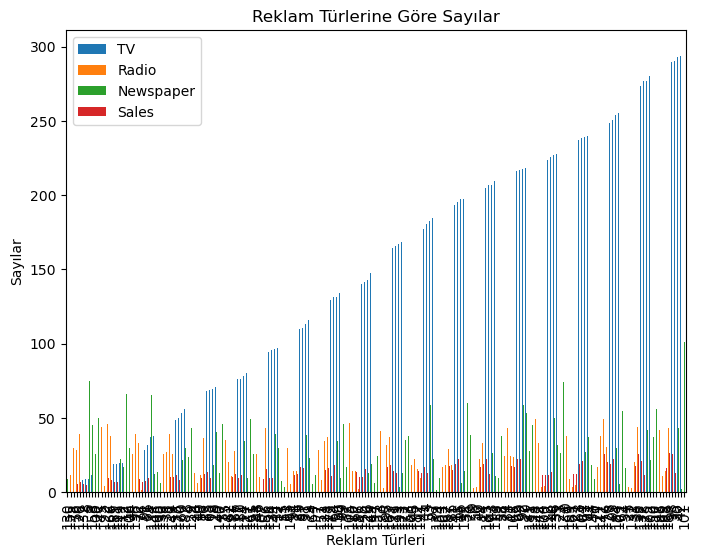

In [12]:
df.plot(kind='bar', figsize=(8, 6))

# Grafik başlığı ve eksen etiketlerini ayarlama
plt.title('Reklam Türlerine Göre Sayılar')
plt.xlabel('Reklam Türleri')
plt.ylabel('Sayılar')

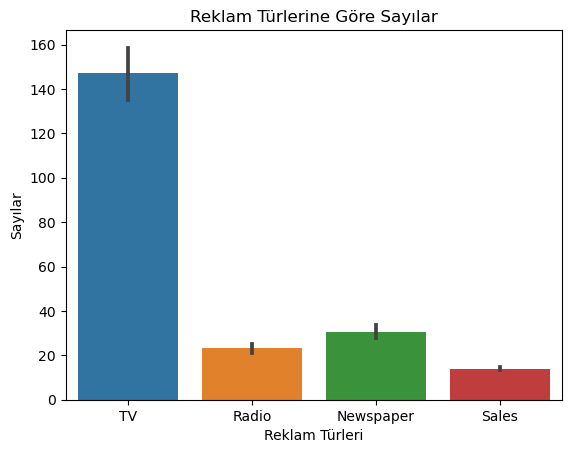

In [13]:
sns.barplot(data=df)
plt.title('Reklam Türlerine Göre Sayılar')
plt.xlabel('Reklam Türleri')
plt.ylabel('Sayılar')
plt.show()

# FEATURE ENGINEERING

In [14]:
df[df["Newspaper"]>85]

,TV,Radio,Newspaper,Sales
75,16.9,43.7,89.4,8.7
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [15]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [16]:
df = df[df['Newspaper'] <= 85] #outlierları attık

In [17]:
df.shape

(197, 4)

In [18]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [19]:
df.head()

,TV,Radio,Newspaper,Sales
130,0.7,39.6,8.7,1.6
155,4.1,11.6,5.7,3.2
78,5.4,29.9,9.4,5.3
56,7.3,28.1,41.4,5.5
126,7.8,38.9,50.6,6.6


In [20]:
#df=df[["Sales", "TV", "Radio", "Newspaper"]].value_counts(normalize=True)


# MODELLING

In [21]:
x=df[["TV","Radio", "Newspaper"]]
y=df[["Sales"]]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=42)

In [24]:
x_train.shape, x_test.shape

((157, 3), (40, 3))

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()

In [27]:
model=lr.fit(x_train, y_train)

In [28]:
tahmin=model.predict(x_test)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
(mean_squared_error(tahmin, y_test)**0.5)

1.4996566596328782

In [31]:
r2_score(tahmin,y_test)

0.9028488225239836

In [32]:
from sklearn.linear_model import Ridge, Lasso

In [33]:
R=Ridge()
L=Lasso()

In [34]:
R.fit(x_train,y_train)

Ridge()

In [35]:
tahmin2=R.predict(x_test)

In [36]:
(mean_squared_error(tahmin2,y_test))**0.5

1.4996599918005646

In [37]:
r2_score(tahmin,y_test)

0.9028488225239836

In [38]:
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor 
from xgboost import XGBRegressor


In [39]:
L = Lasso()
L.fit(x_train,y_train)
y_pred_lasso = L.predict(x_test)
y_pred_lasso

array([20.81548725, 17.32209889,  6.65850124, 11.34503793, 16.4655504 ,
       17.92867277, 13.10401398, 15.10449741, 10.37721192, 21.23244428,
       18.7364458 ,  7.67764757, 14.98225047,  8.86763761, 19.93981572,
       13.34859056, 18.23571139,  3.49302892, 16.78522214, 18.21478812,
       12.89290259,  9.7943649 , 17.42912305,  9.84463228, 12.41940695,
        8.81443224, 14.14206359, 21.39258632,  9.59593196,  9.31937787,
       15.53518317, 14.8611466 , 16.32935656,  4.42945027, 18.51397558,
       14.95321466,  6.59814561,  6.00486147, 15.33275665,  9.70918414])

In [40]:
(mean_squared_error(y_test,y_pred_lasso))**0.5

1.4988398691993101

In [41]:
r2_score(y_test,y_pred_lasso)

0.8794752162460739

In [42]:
E = ElasticNet(l1_ratio = .8)

In [43]:
E.fit(x_train,y_train)
y_pred_elastic = E.predict(x_test)

In [44]:
(mean_squared_error(y_test,y_pred_elastic))**0.5

1.498912762093831

In [45]:
r2_score(y_test,y_pred_elastic)

0.8794634930271238

In [46]:
from sklearn.ensemble import ExtraTreesRegressor

In [47]:

ETR = ExtraTreesRegressor()
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test)

/var/folders/rh/09l5x5h52b18cydcdhf8gr240000gn/T/ipykernel_13256/1103700240.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ETR.fit(x_train,y_train)


In [48]:
(mean_squared_error(y_test,y_pred_etr))**0.5 

0.43725072898738765

In [49]:
r2_score(y_test,y_pred_etr)

0.9897428437400558

In [50]:
from sklearn.ensemble import GradientBoostingRegressor


In [51]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)

/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [52]:
y_pred_gbr = GBR.predict(x_test)

In [53]:
(mean_squared_error(y_test,y_pred_gbr))**0.5  

0.68051771076397

In [54]:
r2_score(y_test,y_pred_gbr)

0.975154670997251

In [55]:
from sklearn.neighbors import KNeighborsRegressor       
est = KNeighborsRegressor(n_neighbors = 10,weights = 'uniform')
model = est.fit(x_train,y_train)

In [56]:
y_pred_knb = model.predict(x_test)

In [57]:
(mean_squared_error(y_test,y_pred_knb))**0.5 

1.5143529971575322

In [58]:
r2_score(y_test,y_pred_knb)

0.8769674203195567

In [59]:
from sklearn.ensemble import ExtraTreesRegressor


In [62]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreesRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
       

    result.R_Squared = r_squared
    result.RMSE = rmse
    
    
    return result.sort_values('R_Squared', ascending=False)

In [63]:
algo_test(x,y)

/var/folders/rh/09l5x5h52b18cydcdhf8gr240000gn/T/ipykernel_13256/1469595741.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  algo.fit(x_train,y_train)
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,R_Squared,RMSE
Extra Tree,0.991842,0.436896
Gradient Boosting,0.982958,0.631461
XGradientBooting,0.980461,0.676133
Lasso,0.904857,1.492002
ElasticNet,0.904050,1.498317
Linear,0.903195,1.504980
Ridge,0.903194,1.504981


In [68]:
import numpy as np

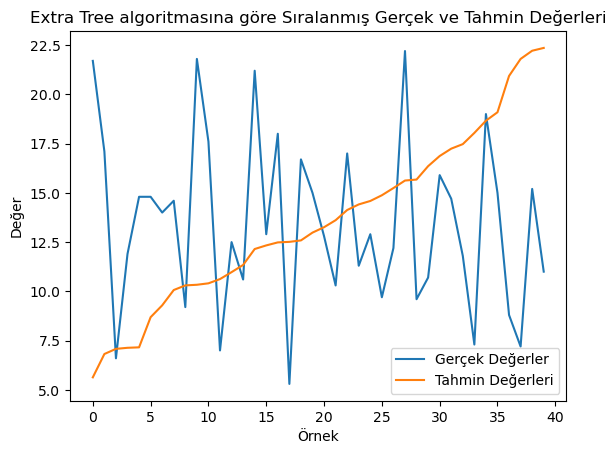

In [81]:
y_test_sorted = np.sort(y_test)
y_prediction_sorted = np.sort(y_pred_etr)
plt.plot(y_test_sorted, label='Gerçek Değerler')
plt.plot(y_prediction_sorted, label='Tahmin Değerleri')
plt.xlabel('Örnek')
plt.ylabel('Değer')
plt.title('Extra Tree algoritmasına göre Sıralanmış Gerçek ve Tahmin Değerleri')
plt.legend()
plt.show()

In [76]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x, y)

/var/folders/rh/09l5x5h52b18cydcdhf8gr240000gn/T/ipykernel_13256/4169178109.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y)


RandomForestRegressor()

In [77]:
y_pred_rf = model.predict(x_test)

In [78]:
r2_score(y_test,y_pred_rf)

0.9958834008032005

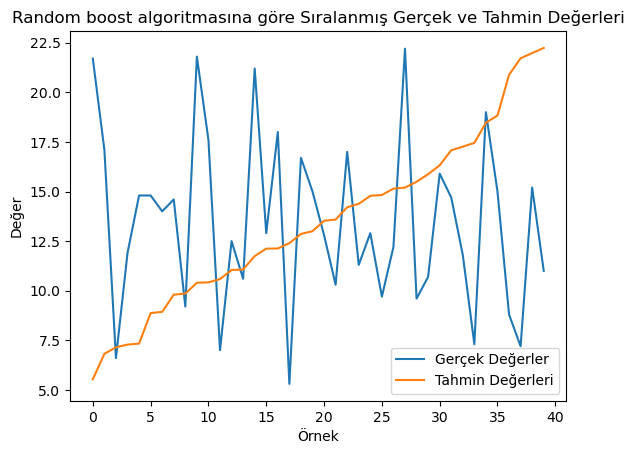

In [80]:
y_test_sorted = np.sort(y_test)
y_prediction_sorted = np.sort(y_pred_rf)
plt.plot(y_test_sorted, label='Gerçek Değerler')
plt.plot(y_prediction_sorted, label='Tahmin Değerleri')
plt.xlabel('Örnek')
plt.ylabel('Değer')
plt.title('Random boost algoritmasına göre Sıralanmış Gerçek ve Tahmin Değerleri')
plt.legend()
plt.show()

In [83]:
importance_values = model.feature_importances_

# Katsayı tablosunu oluşturma
coefficient_table = pd.DataFrame({'Feature': x.columns, 'Importance': importance_values})
coefficient_table.sort_values(by='Importance', ascending=False, inplace=True)
coefficient_table.reset_index(drop=True, inplace=True)

print(coefficient_table)

     Feature  Importance
0         TV    0.636484
1      Radio    0.356380
2  Newspaper    0.007137


#### Modele göre en iyi tahmin %99.5 ile Random Forest algoritması ile yapılıyor. Analizlerim sonucu satışları pozitif ve anlamlı etkileyen en etkili yöntem sırasıyla TV reklamları, radyo reklamları ve gazete reklamlarıdır.